**Importing libraries**

In [70]:
import numpy as np     # linear algebra
import pandas as pd    # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt

**Uploading dataset**

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Reading dataset**

In [72]:
data = pd.read_excel("/content/drive/MyDrive/Zomato_eda.xlsx")

In [73]:
data.head() # reading 1st five rows of our dataset

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,Unnamed: 1688,Unnamed: 1689,Unnamed: 1690,Unnamed: 1691,Unnamed: 1692,Unnamed: 1693,Unnamed: 1694,Unnamed: 1695,Unnamed: 1696,Unnamed: 1697
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555_x000D_\n+91 9743772233,Banashankari,Casual Dining,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447_x000D_\n+91 9901210005,Basavanagudi,Casual Dining,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Removing Empty Columns and Unnamed Columns**

In [74]:
data = data.dropna(axis=1, how='all')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [75]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555_x000D_\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447_x000D_\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [76]:
data.info()  # checking information of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          1498 non-null   object
 1   address                      1499 non-null   object
 2   name                         1499 non-null   object
 3   online_order                 1499 non-null   object
 4   book_table                   1499 non-null   object
 5   rate                         1369 non-null   object
 6   votes                        1499 non-null   object
 7   phone                        1481 non-null   object
 8   location                     1499 non-null   object
 9   rest_type                    1496 non-null   object
 10  dish_liked                   682 non-null    object
 11  cuisines                     1496 non-null   object
 12  approx_cost(for two people)  1499 non-null   object
 13  reviews_list                 1499

Here we can see we are having 17 columns and some columns including NaN values and incorrect data_types.

Ex: approx_cost(for two people) column has integer values but having object data_type.

**Droping Unnecessary Columns**

Ex: Phone_Number, we not able to predict anything using Phone numbers. So, we can drop that columns which we are not going to use.

In [77]:
data.drop(['url','reviews_list','menu_item','address','phone','dish_liked'],axis=1,inplace=True)
data.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari


In [78]:
data.shape

(1499, 11)

**Checking for Missing & Duplicate Data**
### Missing values

In [79]:
data.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,130
votes,0
location,0
rest_type,3
cuisines,3
approx_cost(for two people),0
listed_in(type),53


### Percentage of missing values:

In [80]:
(data.isnull().sum()/len(data))*100

,0
name,0.000000
online_order,0.000000
book_table,0.000000
rate,8.672448
votes,0.000000
location,0.000000
rest_type,0.200133
cuisines,0.200133
approx_cost(for two people),0.000000
listed_in(type),3.535690


### Checking Duplicates

In [81]:
data.duplicated().sum()

np.int64(9)

### Removing Duplicates

In [82]:
data.drop_duplicates(inplace=True)

After Removing Duplicates

In [83]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1494,False
1495,False
1496,False
1497,False


**Renaming Column names**

In [84]:
data.rename(columns={'name':'restaurants','rate':'rating','cuisines':'food_type','listed_in(type)':'type','listed_in(city)':'city','approx_cost(for two people)':'cost'},inplace=True)

In [85]:
data.head()

,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


**Cleaning Individual Columns**



###  Column: 'restaurants'



In [86]:
data.groupby('restaurants').count().head()

,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
restaurants,,,,,,,,,,
1947,2,2,2,2,2,2,2,2,2,2
"""""RATED\n Best place for chicken leg roast in whole bangalore.Even neer dosa is good.\nBiryani is not good.\nAmbience is not good.\nService is average.\n\nBill won't burn a hole in your pocket."""")",1,1,1,1,1,1,1,1,1,1
"""""RATED\n Roof top peppy peppers cafe ...\nIt's really superb ambiance",1,1,1,1,1,1,1,1,1,1
"""""RATED\n So I have had chicken here before. Had no idea about the vegetarian food. We ordered veg biryani for two and the quantity was so much 4 of us ate all of it. Heart warming lovely food with huge pieces of paneer and vegetables served with Curry and raita. It's good. Not at all disappointing for a veg biryani"""")",1,1,1,1,1,1,1,1,0,0
"""""RATED\n The buffet is inr 330 pp all incl. But the quality is very mediocre",1,1,1,1,1,1,1,1,1,1


Here we can see we got restaurant names having disturbed characters.

So we need to remove those characters from the name using pattern matcing to get orignal names.

In [87]:

# '[Ãx][^A-Za-z]+' pattern I got to find disturbed characters using regex.And Replacing those charachters with empty space.
data['restaurants']=data['restaurants'].str.replace('[Ãx][^A-Za-z]+','',regex=True)


In [88]:
data.groupby('restaurants').count().head()


,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
restaurants,,,,,,,,,,
"""""RATED\n Best place for chicken leg roast in whole bangalore.Even neer dosa is good.\nBiryani is not good.\nAmbience is not good.\nService is average.\n\nBill won't burn a hole in your pocket."""")",1,1,1,1,1,1,1,1,1,1
"""""RATED\n Roof top peppy peppers cafe ...\nIt's really superb ambiance",1,1,1,1,1,1,1,1,1,1
"""""RATED\n So I have had chicken here before. Had no idea about the vegetarian food. We ordered veg biryani for two and the quantity was so much 4 of us ate all of it. Heart warming lovely food with huge pieces of paneer and vegetables served with Curry and raita. It's good. Not at all disappointing for a veg biryani"""")",1,1,1,1,1,1,1,1,0,0
"""""RATED\n The buffet is inr 330 pp all incl. But the quality is very mediocre",1,1,1,1,1,1,1,1,1,1
"""""RATED\n The food here is just about an average",1,1,1,1,1,1,1,1,1,1


Here see we successfully removed the disturbed characters from restaurant name(refer 5th row to see transformation)

By reading the databse I found the names having incorrect spell. Let me correct them as well.

In [89]:
data['restaurants']=data['restaurants'].str.replace('Caf-|Caf ','Cafe ',regex=True) # replacing the Caf- or Caf names with cafe using pattern matching


###  Column: 'online_order'

This column shows that restaurants accepting online orders or not

In [90]:
data['online_order'].unique() # Using .unique() we can find the unique values from column

array(['Yes', 'No', " ('Rated 4.0'", " ('Rated 2.0'", " ('Rated 5.0'",
       ' grilled chicken was good',
       " 'RATED\\n  Love the ambience! This is the place to go if youÃƒÂƒ\\x83ÃƒÂ‚\\x83ÃƒÂƒ\\x82ÃƒÂ‚\\x82ÃƒÂƒ\\x83ÃƒÂ‚\\x82ÃƒÂƒ\\x82ÃƒÂ‚\\x92re looking for authentic oriental food. They have special breakfast menu which is worth a try for everyone! And they make amazing cocktails :)')",
       ' loved it',
       " so is the variety. Daal baati didn't feel like one... I could eat",
       " neither it's too good nor its bad.\\nThe starters taste needs a Lil improvement.\\nWorth a try",
       " ('Rated 1.0'",
       " and we had to settle in for honey chilli potato which was awful. And the ambience here is bad too.')",
       " ('Rated 4.5'",
       " 'RATED\\n  Good food options available but the chai here is really up to mark and I kind of liked the packaging and the cups and stuff. The place is a bit small!')",
       " 'RATED\\n  The only brewery in Jayanagar",
       ' ""RATE

Here we found several unwanted values, so we define these unwanted values as a 'Nan' value.

In [91]:
data['online_order'] = data['online_order'].str.lower()

# Replace all values that are not 'yes' or 'no' with NaN or a default (e.g., 'no')
data['online_order'] = data['online_order'].apply(lambda x: x if x in ['yes', 'no'] else 'Nan')

# Check the unique values now
print(data['online_order'].unique())

['yes' 'no' 'Nan']


In [92]:
data[['online_order']]

,online_order
0,yes
1,yes
2,yes
3,no
4,no
...,...
1494,yes
1495,yes
1496,yes
1497,no


Now we remove these null values from the 'online_order' column.

In [93]:
data.dropna(subset=['online_order'], inplace=True)
data[['online_order']]

,online_order
0,yes
1,yes
2,yes
3,no
4,no
...,...
1494,yes
1495,yes
1496,yes
1497,no


### Column: 'rating'

In [94]:
data['rating'].unique()


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5',
       '\\nTop floor', '4.2/5', '3.9/5', '3.1/5', '3.0/5', '3.2/5',
       '3.3/5', '2.8/5', " ('Rated 1.0'", " ('Rated 5.0'", '4.4/5',
       ' always a good experience',
       ' a mocktail and did i just hear unlimited desserts?!\\nGoodbye midweek blues!!!?\\n\\nI would specially mention the staff here-Chaitanya',
       '4.3/5',
       " 'RATED\\n  First thing about this place is.. PAN Asian cuisine.. there are hardly any place which serves sushi etc in this part of Bangalore.. you can park your vehicle at BDA Complex parking.. and enjoy your evening peacefully.. ambiance is nice... food is delicious..\\nwe tried veg dim sum platter",
       " ('Rated 4.0'", 'NEW', '2.9/5',
       ' chicken chengezi and assorted breads. I was absolutely surprised at the quality of food at this point of day. I\'d definitely recommend it to all my friends."")',
       '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5', '4.5/5', '2.5/5',
       ' you 

Found unwanted data, thus cleaning this column

Filling the column with a rating of '2.0/5' where illegitimate rating is mentioned.

In [95]:
data['rating'] = data['rating'].apply(lambda x: x if re.match(r'^\d(\.\d)?/5$', str(x)) else '2.0/5')

data['rating'].unique()


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '2.0/5',
       '4.2/5', '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5',
       '4.4/5', '4.3/5', '2.9/5', '3.5/5', '2.6/5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5'], dtype=object)

Changing the fractional value of rating to decimal:

In [96]:
data['rating'] = data['rating'].apply(lambda x: str(x).replace('/5', ''))

data['rating'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '2.0', '4.2', '3.9',
       '3.1', '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.9', '3.5',
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7'], dtype=object)

### Column: 'location'

In [97]:
data.location.unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road',
       " a nice place to give a try.')",
       " 'RATED\\n  it was not worth the money')", ' potato', 'Jayanagar',
       ' ""RATED\\n  The food was good and the ambience was quite impressive too. The service also was up to the mark',
       " never have i had such an experience.\\nWhat really makes your food enjoyable is just not the taste but how the person served you!\\n\\nTop notch guys!!\\nComing back for more-offer or no offer ! ?')",
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       ' yakisoba (buckwheat noodles)',
       ' taste was just amazing and the crust was perfect later we ordered for peppy panner pizza where the taste was good but the crust was watery where we couldn\'t take and hold it in our hands.\\nFully not satisfied nor fully not disappointed."")',
       " even Better Service in the middle of night #LSD Great Work. Best option for the night owls\\nPS. Love the Pasta and garlic bread c

Many unwanted values are present in this column so we try to remove them by pattern matching technique to detect the values.

In [98]:
data = data[~data['location'].str.contains(r'RATED|\(|\)|\\n|\\x|chicken|pizza|soup', case=False, na=False)]

In [99]:
data = data.reset_index(drop=True)   # Reset index

print(data['location'].unique())     # View cleaned unique locations

['Banashankari' 'Basavanagudi' 'Mysore Road' ' potato' 'Jayanagar'
 'Kumaraswamy Layout' 'Rajarajeshwari Nagar' 'Vijay Nagar'
 ' they had a board that said spl buffet. There was nothing special about it. The usual north indian thali'
 'Uttarahalli' 'JP Nagar' 'South Bangalore'
 " the seating is a problem otherwise the food is really tasty.. I've tried the Manchurian"
 'City Market' ' bhel'
 ' this place is a great choice for its variety in fries' 'Nagarbhavi'
 'Bannerghatta Road' 'BTM'
 ' of top notch quality and great taste. This place might be a hard to locate the first time. It is right in front of IIM Bangalore'
 'Kanakapura Road' ' mutton is well cooked and soft'
 ' biryani also came very late'
 ' each variant is lavished with aromatic whole spices such as clove'
 'Bommanahalli']


Now, we derived a much cleaner 'locations' column.

Further, cleaning this column to extract true location values.

In [100]:
locations = ['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar', 'Kumaraswamy Layout',
    'Rajarajeshwari Nagar', 'Vijay Nagar', 'Uttarahalli', 'JP Nagar', 'Nagarbhavi',
    'Bannerghatta Road', 'Kanakapura Road', 'South Bangalore', 'City Market',
    'BTM', 'Bommanahalli']

data = data[data['location'].isin(locations)]

data = data.reset_index(drop=True)  # Reset the index (optional, for neatness)

print(data['location'].unique())

['Banashankari' 'Basavanagudi' 'Mysore Road' 'Jayanagar'
 'Kumaraswamy Layout' 'Rajarajeshwari Nagar' 'Vijay Nagar' 'Uttarahalli'
 'JP Nagar' 'South Bangalore' 'City Market' 'Nagarbhavi'
 'Bannerghatta Road' 'BTM' 'Kanakapura Road' 'Bommanahalli']


In [101]:
data[['location']]

,location
0,Banashankari
1,Banashankari
2,Banashankari
3,Banashankari
4,Basavanagudi
...,...
1434,Bannerghatta Road
1435,Bannerghatta Road
1436,JP Nagar
1437,Bannerghatta Road


### Column: 'cost'

In [102]:
data['cost'] = pd.to_numeric(data['cost'], errors='coerce')

# Drop rows where 'cost' is NaN (i.e., was non-numeric)
data = data.dropna(subset=['cost'])

# Now 'cost' column is numeric only
print("Unique Restaurant Names:", data['restaurants'].nunique())

print(data.head())

Unique Restaurant Names: 1060
             restaurants online_order book_table rating votes      location  \
0                  Jalsa          yes        Yes    4.1   775  Banashankari   
1         Spice Elephant          yes         No    4.1   787  Banashankari   
2        San Churro Cafe          yes         No    3.8   918  Banashankari   
3  Addhuri Udupi Bhojana           no         No    3.7    88  Banashankari   
4          Grand Village           no         No    3.8   166  Basavanagudi   

             rest_type                       food_type  cost    type  \
0        Casual Dining  North Indian, Mughlai, Chinese   800  Buffet   
1        Casual Dining     Chinese, North Indian, Thai   800  Buffet   
2  Cafe, Casual Dining          Cafe, Mexican, Italian   800  Buffet   
3          Quick Bites      South Indian, North Indian   300  Buffet   
4        Casual Dining        North Indian, Rajasthani   600  Buffet   

           city  
0  Banashankari  
1  Banashankari  
2  Banas

## Performing Summary Statistics

Using describe() to get a brief statistics overview of our dataset:

In [103]:
data.describe(include="all")

,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
count,1437,1439,1439,1439,1439.0,1439,1436,1436,1439.000000,1394,1394
unique,1060,2,2,24,396.0,16,45,493,NaN,6,2
top,New Prashanth Hotel,yes,No,2.0,0.0,Banashankari,Quick Bites,South Indian,NaN,Delivery,Banashankari
freq,6,1084,1355,206,206.0,480,639,98,NaN,949,835
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,423.230716,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,244.537714,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550.000000,NaN,NaN


Total number of unique restaurants:

In [104]:
unique_restaurants = data['restaurants'].nunique()
print("Total Unique Restaurants:", unique_restaurants)

Total Unique Restaurants: 1060


Total number of Restaurant types:

In [105]:
unique_rest_types = data['rest_type'].nunique()
print("Total Unique Restaurant Types:", unique_rest_types)

Total Unique Restaurant Types: 45


Other Summaries:

In [106]:
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')  # Invalid entries become NaN

# Now safely run your groupby and other aggregations
print("Highest Rated Cuisine:", data.groupby('food_type')['rating'].mean().idxmax())

print("Location with most Restaurants:", data['location'].mode()[0])

print("Most Common Restaurant Type:", data['rest_type'].mode()[0])

Highest Rated Cuisine: North Indian, European, Mediterranean, BBQ, Kebab
Location with most Restaurants: Banashankari
Most Common Restaurant Type: Quick Bites


### Computing Correlation between ratings and cost of the restaurants

In [107]:
numeric_data = data[['rating', 'cost']]

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the matrix
print(correlation_matrix)

          rating      cost
rating  1.000000  0.258852
cost    0.258852  1.000000


## Data Visualization

### Calculate the percentage of order placed online

In [108]:
percentage = data['online_order'].value_counts(normalize=True) * 100
print(percentage)

online_order
yes    75.33009
no     24.66991
Name: proportion, dtype: float64


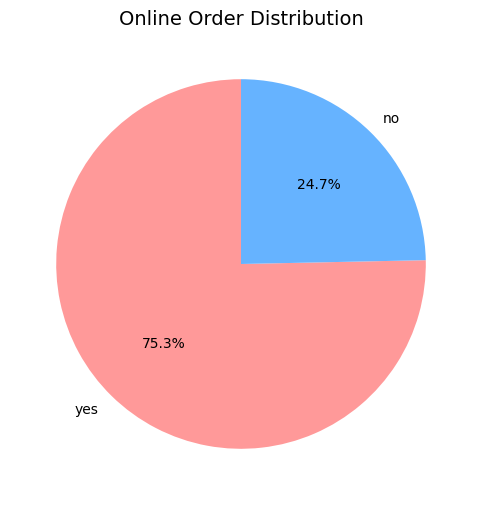

In [109]:
# Count occurrences of each category
order_counts = data['online_order'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(order_counts, labels=order_counts.index, autopct='%1.1f%%',
        startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Online Order Distribution', fontsize=14)
plt.show()

### Calculating Top 10 Restaurants by Rating

In [110]:
top_10 = data.sort_values(by='rating', ascending=False).head(10)[['restaurants', 'rating']]

print(top_10)

                   restaurants  rating
627               Taaza Thindi     4.7
861            Barbeque Nation     4.7
44                      Onesta     4.6
557                     Onesta     4.6
1027                  Galito's     4.6
164   The Blue Wagon - Kitchen     4.6
7                       Onesta     4.6
915                    eat.fit     4.5
926          XO Belgian Waffle     4.5
181              Shakes Theory     4.5


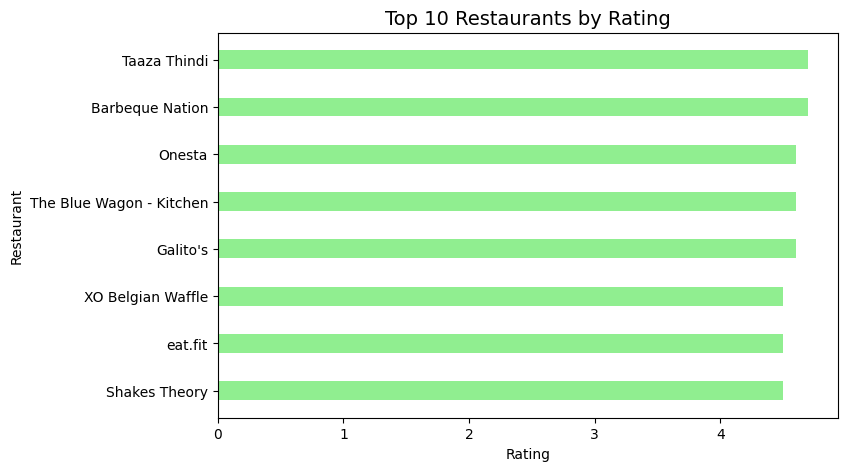

In [111]:
top_10['rating'] = pd.to_numeric(top_10['rating'], errors='coerce')

# Group by restaurant name (merge duplicates)
top10_grouped = top_10.groupby('restaurants', as_index=False)['rating'].mean()

# Sort by rating
top10_grouped = top10_grouped.sort_values(by='rating', ascending=True)

# Plot bar chart
plt.figure(figsize=(8,5))
plt.barh(top10_grouped['restaurants'], top10_grouped['rating'], color='lightgreen', height=0.4)
plt.title('Top 10 Restaurants by Rating', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Restaurant')
plt.show()

### Top 10 Costly Restaurants

In [112]:
print("Unique Restaurant Names:", data['restaurants'].nunique())

# Top 10 highest costing restaurants
top_costly = data.groupby('restaurants')['cost'].mean().nlargest(10).to_frame()

# Style with background gradient
top_costly.style.background_gradient(cmap='Reds').format("{:.2f}")

Unique Restaurant Names: 1060


,cost
restaurants,
Barbeque Nation,1600.00
Brewsky,1600.00
BANGALORE BOX,1500.00
Brew Meister,1500.00
Chutney Chang,1500.00
Moksha,1500.00
Caffe Pascucci,1300.00
Jcubez,1300.00
Toscano,1300.00


### Top 10 areas with most restaurants

In [113]:
top_locations = data['location'].value_counts().head(10)
print(top_locations)

location
Banashankari          480
Bannerghatta Road     215
JP Nagar              212
Basavanagudi          177
BTM                   137
Jayanagar             105
Kumaraswamy Layout     56
Mysore Road            20
Uttarahalli            12
South Bangalore         7
Name: count, dtype: int64


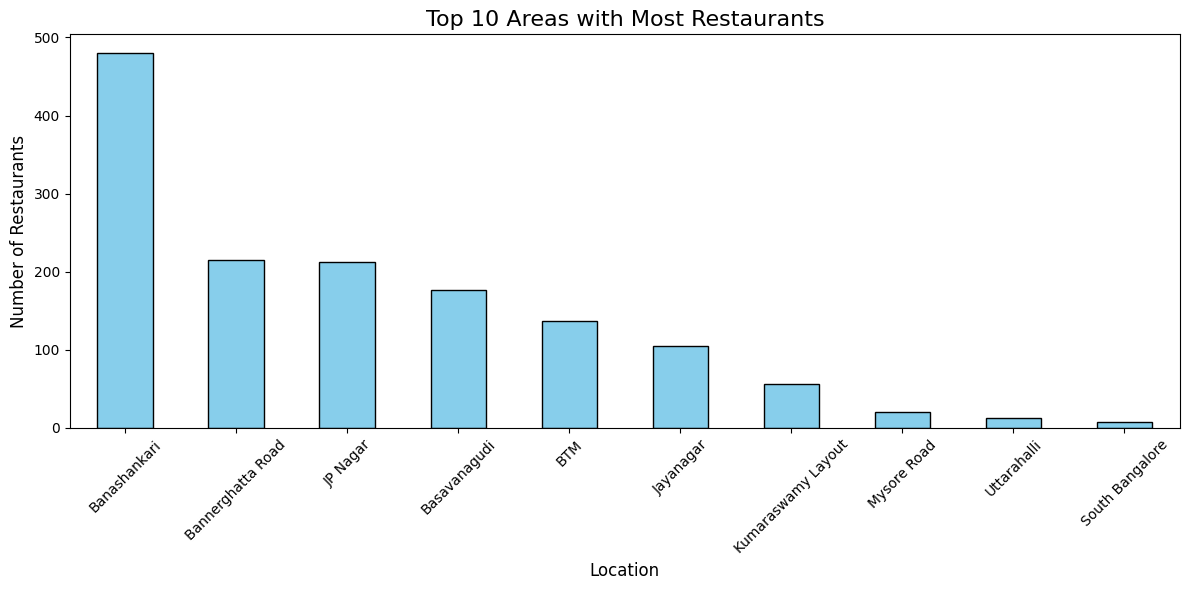

In [114]:
# Plotting bar chart

plt.figure(figsize=(12, 6))
top_locations.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Areas with Most Restaurants', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()